# Netflix Data Analysis

Bienvenue dans cette analyse des données Netflix.  
Ce projet a pour but d'explorer un dataset regroupant les films et séries disponibles sur la plateforme en septembre 2021.  
Nous allons nettoyer, explorer et visualiser ces données à l’aide des bibliothèques Python les plus utilisées en data science : **Pandas**, **Matplotlib**, **Missingno**, etc.

---

# Sommaire

1. Chargement et aperçu du dataset  
2. Nettoyage et Traitement des données 
3. Visualisations graphiques
4. Conclusion stratégique

---

# 1. Chargement du dataset et aperçu

Nous allons maintenant charger le dataset Netflix dans un DataFrame Pandas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv("netflix_titles.csv")

## On affiche les 5 premières et 5 dernières lignes pour mieux comprendre la structure.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111.0


# 2. Nettoyage et Traitement des données 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_minutes  6128 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB

## Nombre de lignes (observations) et de colonnes (variables).

In [ ]:
df.shape

(8807, 13)

## Liste des colonnes


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_minutes'],
      dtype='object')

## Types des données et catégorisation


In [ ]:
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
duration_minutes           float64
dtype: object

## Pourcentage de valeurs manquantes par colonne


In [ ]:
df.isnull().mean() * 100

show_id              0.000000
type                 0.000000
title                0.000000
director            29.908028
cast                 9.367549
country              9.435676
date_added           1.112751
release_year         0.000000
rating               0.045418
duration             0.034064
listed_in            0.000000
description          0.000000
duration_minutes    30.418985
dtype: float64

Analyse :  Il manque beaucoup trop d'informations sur les directeurs des oeuvres, or c'est hyper important car c'est le créateur de l'oeuvre, sans lui elle n'existe pas.

## Visualisation des données manquantes par colonnes


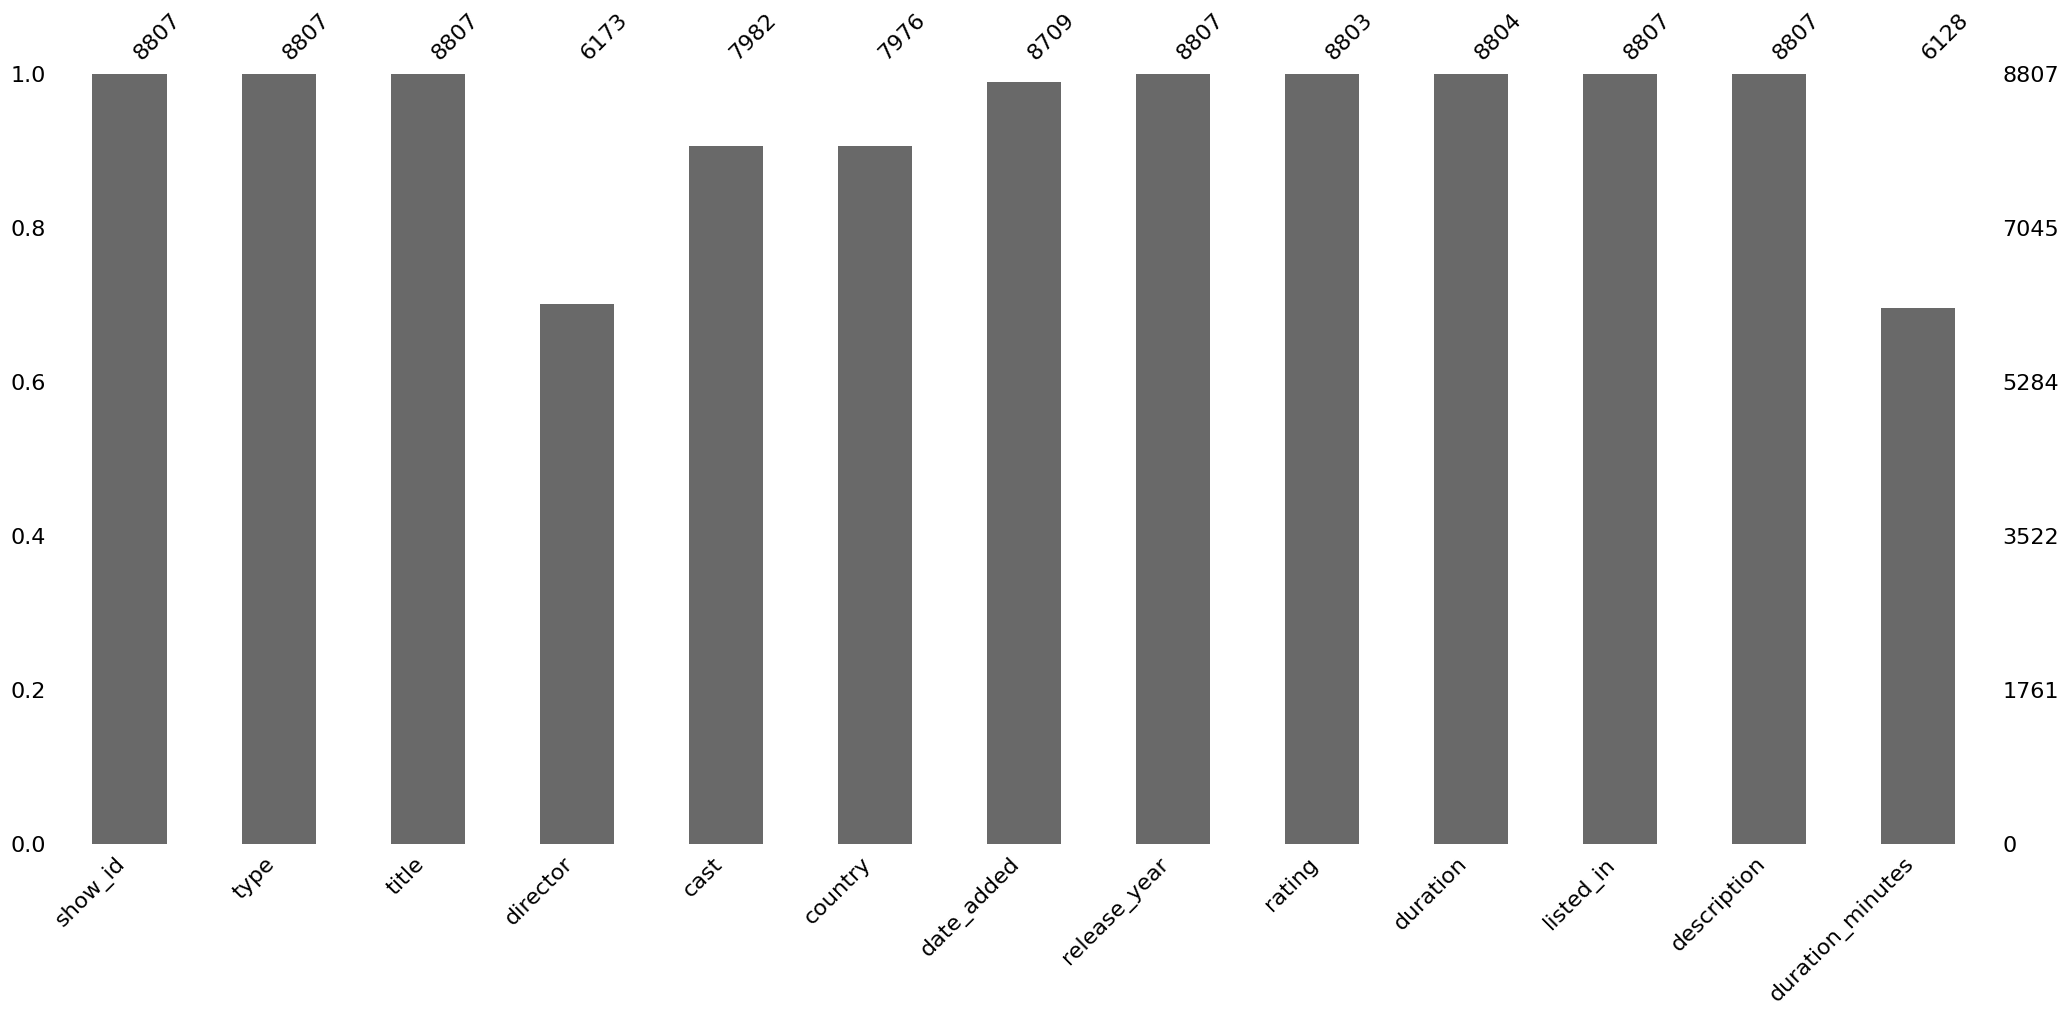

In [ ]:
msno.bar(df)
plt.show()

Analyse : Manque des infos de directeurs, de pays d'origine, et durée en minutes, donc manque d'informations à certains endroits.

Il faut récupérer ces informations pour être le plus complet possible et permettre à tout le monde d'accéder aux infos.

## Observation aléatoire


In [ ]:
df.sample(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
549,s550,TV Show,Big Timber,NaN,NaN,NaN,2021-07-02,2020,TV-14,1 Season,"International TV Shows, Reality TV",A no-nonsense logger and his loyal crew battle...,NaN


## Recherche d'informations sur l'œuvre “Catch Me If You Can”


In [ ]:
df[df['title'] == "Catch Me If You Can"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,142.0


## Film le plus récent du dataset


In [ ]:
films = df[df['type'] == 'Movie']
films.sort_values(by='release_year', ascending=False)[['title', 'release_year']].head(1)

,title,release_year
93,JJ+E,2021


## Série la plus récente du dataset


In [ ]:
series = df[df['type'] == 'TV Show']
series.sort_values(by='release_year', ascending=False)[['title', 'release_year']].head(1)

,title,release_year
225,Open Your Eyes,2021


## Conversion de date_added en DateTime


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

## Durée des films (en minutes)


In [ ]:
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)

## Durée des séries (en saisons)


In [ ]:
df['duration_seasons'] = df['duration'].apply(lambda x: float(x.split()[0]) if 'Season' in str(x) else np.nan)

## Conversion de listed_in en liste


In [ ]:
df['listed_in_list'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in str(x).split(',')])

## Affichage des Valeurs uniques


In [ ]:
df['type'].unique(), df['country'].unique(), df['release_year'].unique(), df['rating'].unique(), df['listed_in'].unique()

(array(['Movie', 'TV Show'], dtype=object),
 array(['United States', 'South Africa', nan, 'India',
        'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
        'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
        'Australia', 'United States, India, France', 'Finland',
        'China, Canada, United States',
        'South Africa, United States, Japan', 'Nigeria', 'Japan',
        'Spain, United States', 'France', 'Belgium',
        'United Kingdom, United States', 'United States, United Kingdom',
        'France, United States', 'South Korea', 'Spain',
        'United States, Singapore', 'United Kingdom, Australia, France',
        'United Kingdom, Australia, France, United States',
        'United States, Canada', 'Germany, United States',
        'South Africa, United States', 'United States, Mexico',
        'United States, Italy, France, Japan',
        'United States, Italy, Romania, United Kingdom',
        'Australia, United States

## Réalisateurs ayant produit plusieurs œuvres

Nous cherchons à savoir quels réalisateurs apparaissent plusieurs fois dans le dataset.

In [ ]:
directors_counts = df['director'].value_counts()

directors_counts[directors_counts > 1].head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

Analyse : Oui, plusieurs réalisateurs ont produit plusieurs œuvres, dont certains plus de 10 fois.


## Année avec le plus de films publiés


In [ ]:
films['release_year'].value_counts().idxmax()

np.int64(2017)

## Année avec le plus de séries publiés

In [ ]:
series['release_year'].value_counts().idxmax()

np.int64(2020)

# 3. Visualisations des données Netflix

### a. Répartition des types d'œuvres

Ce graphique montre la répartition entre films et séries sur Netflix.


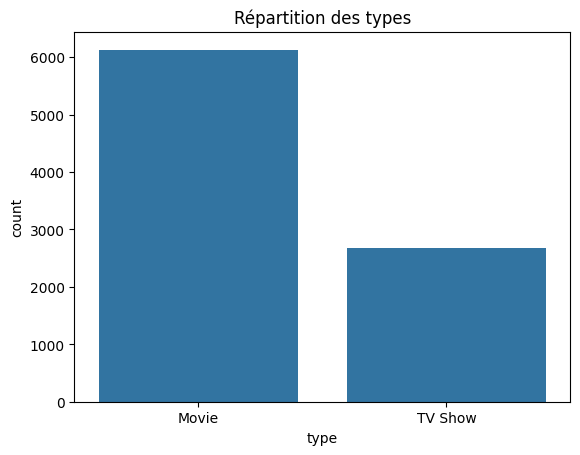

In [ ]:
sns.countplot(data=df, x='type')
plt.title('Répartition des types')
plt.show()

Analyse : Une majorité de films (près de 2x plus que les séries, soit environ 6000 films).

### b. Répartition des œuvres par pays (Top 10)

On affiche les pays qui ont le plus de contenus sur la plateforme.


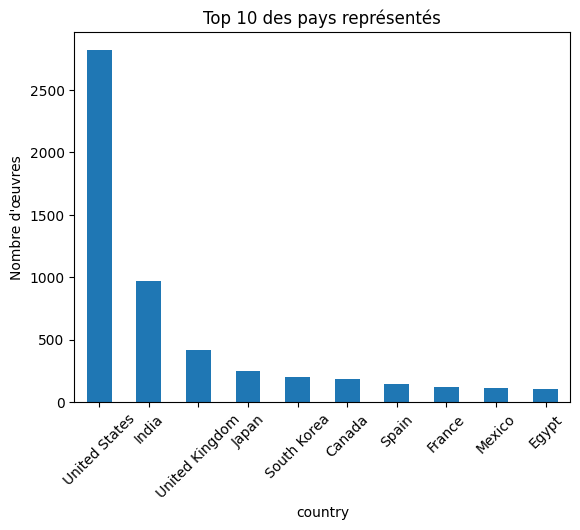

In [ ]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des pays représentés')
plt.ylabel('Nombre d\'œuvres')
plt.xticks(rotation=45)
plt.show()

Analyse : Une forte dominance des contenus provenant des États-Unis (+2500 œuvres), suivis par l’Inde (~1000 œuvres).

**Diversification des origines géographiques** </br>
Étant donné la doimnance américaine, Netflix pourrait valoriser davantage les contenus non-anglophones, notamment en :
- Produisant ou co-produisant plus d’œuvres en Europe, Afrique et Amérique latine
- Mettant en avant des sections dédiées aux films et séries locaux ou régionaux
- Misant sur les talents émergents internationaux

### c. Répartition des œuvres par année de sortie

Ce graphique montre l’évolution du nombre de contenus au fil des années.


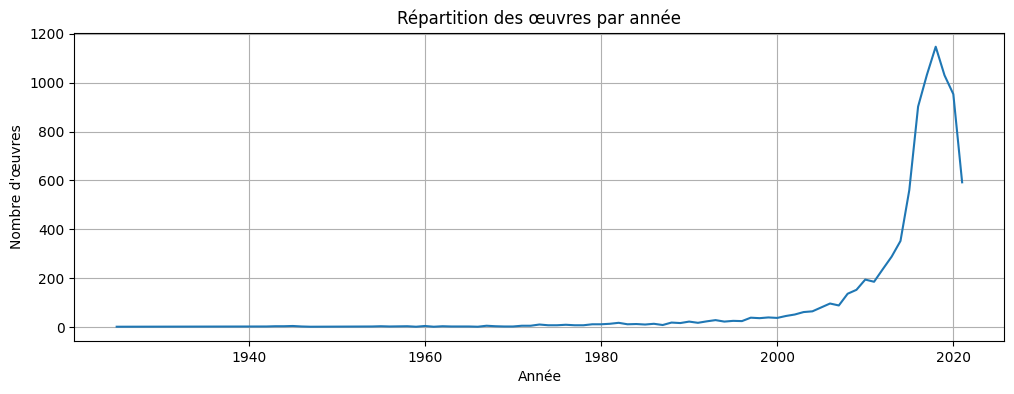

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12, 4))
plt.title('Répartition des œuvres par année')
plt.xlabel("Année")
plt.ylabel("Nombre d'œuvres")
plt.grid(True)
plt.show()

Analyse : Un pic de sorties d'œuvres en 2019 (1150 œuvres) et 2020 (1000 œuvres).

### d. Répartition des classifications (ratings)

Affiche les types de classifications des œuvres (ex : PG-13, TV-MA…).


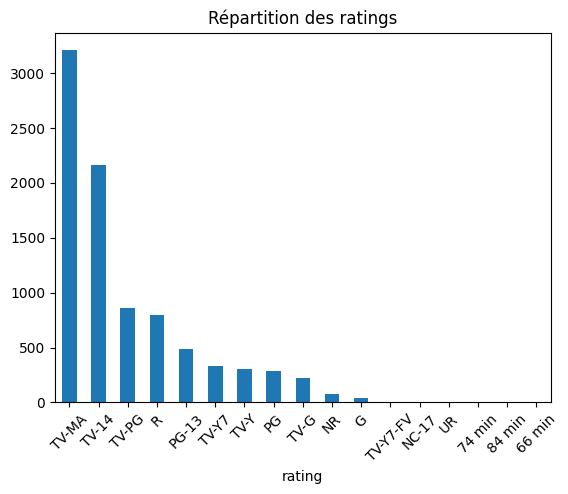

In [ ]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Répartition des ratings')
plt.xticks(rotation=45)
plt.show()

Analyse : Une classification majoritaire en TV-MA (Mature Audience), avec plus de 3000 œuvres.

### e. Répartition de la durée des films

Analyse de la durée des films en minutes.


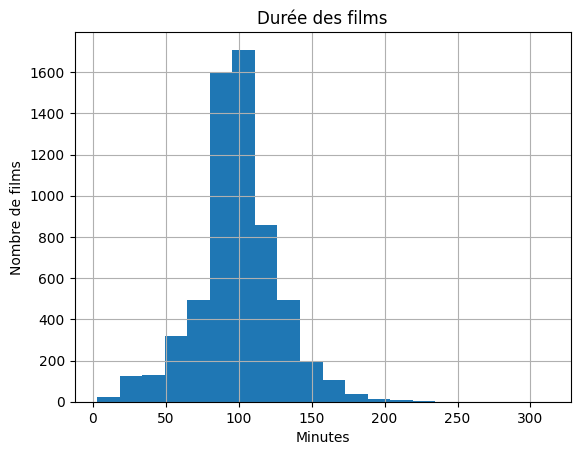

In [ ]:
films = df[df['type'] == 'Movie']
films['duration_minutes'].dropna().hist(bins=20)
plt.title("Durée des films")
plt.xlabel("Minutes")
plt.ylabel("Nombre de films")
plt.show()

Analyse : La durée des films est en général comprise entre 60 et 125 minutes.

**Capitaliser sur les formats populaires (60-125 min)** </br>
La majorité des films durent entre 1h et 2h :
- Proposer des collections adaptées à la durée disponible de l’utilisateur (ex. “Films à regarder pendant la pause déjeuner”, “Session ciné de 2h max”)

### f. Répartition du nombre de saisons des séries

On affiche combien de saisons ont les séries présentes sur Netflix.


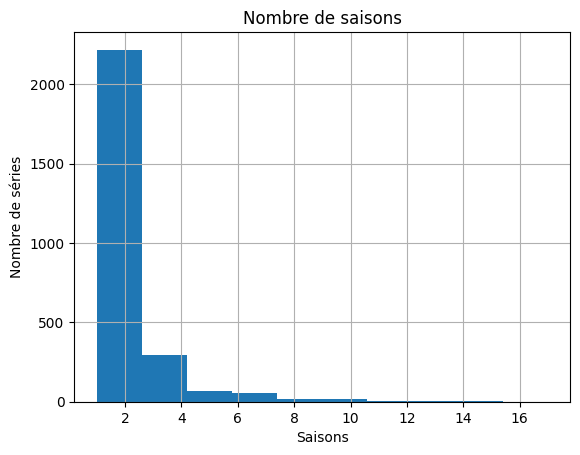

In [ ]:
series = df[df['type'] == 'TV Show']
series['duration_seasons'].dropna().hist(bins=10)
plt.title("Nombre de saisons")
plt.xlabel("Saisons")
plt.ylabel("Nombre de séries")
plt.show()

Analyse : Les séries comptent principalement 2 à 3 saisons.

### g. Répartition des genres (Top 10)

Ce graphique montre les genres les plus populaires.


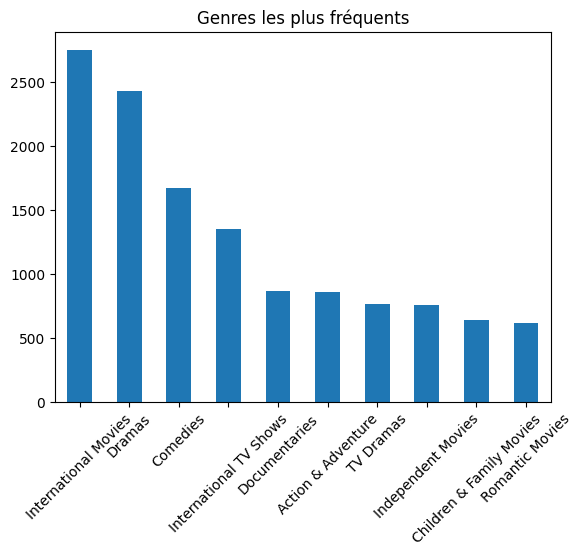

In [ ]:
from collections import Counter
all_genres = sum(df['listed_in_list'], [])
pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Genres les plus fréquents")
plt.xticks(rotation=45)
plt.show()

Analyse : Les genres dominants sont : International Movies, Dramas, Comedies, International TV Shows, et Documentaries.

**Optimisation de l'expérience de recommandation** </br>
En se basant sur les genres les plus regardés, Netflix peut :
- Personnaliser davantage la page d’accueil selon l’historique de visionnage
- Proposer des parcours utilisateurs par genre (ex : “Explorez les drames internationaux en 5 étapes”)

**Renforcer la production de documentaires et de contenus éducatifs** </br>
Le genre documentaire est bien représenté et en croissance :
- Créer une catégorie “Netflix Learning” ou “Docs à ne pas manquer”
- Associer ces contenus à des événements d’actualité ou à des causes sociales

### h. Top 5 des séries les plus longues

Séries avec le plus grand nombre de saisons.


In [ ]:
series[['title', 'duration_seasons']].sort_values(by='duration_seasons', ascending=False).head(5)

,title,duration_seasons
548,Grey's Anatomy,17.0
4798,NCIS,15.0
2423,Supernatural,15.0
1354,Heartland,13.0
4220,COMEDIANS of the world,13.0


Analyse : Les séries les plus longues incluent Grey's Anatomy, NCIS, Supernatural, Heartland.

**Meilleure visibilité des séries à succès longue durée** </br>
Des séries très longues et populaires comme Grey's Anatomy ou Supernatural sont souvent noyées dans le catalogue.
- Créer une catégorie "séries longues"
- Mettre en avant ces titres pour les utilisateurs à la recherche d’un engagement long terme

### i. Top 5 des films les plus longs

Affiche les films avec la durée la plus importante.


In [ ]:
films[['title', 'duration_minutes']].sort_values(by='duration_minutes', ascending=False).head(5)

,title,duration_minutes
4253,Black Mirror: Bandersnatch,312.0
717,Headspace: Unwind Your Mind,273.0
2491,The School of Mischief,253.0
2487,No Longer kids,237.0
2484,Lock Your Girls In,233.0


Analyse : Les films les plus longs dépassent 250min

### j. Réalisateurs les plus actifs pour les œuvres françaises

On affiche les réalisateurs qui apparaissent le plus souvent dans les œuvres produites en France.


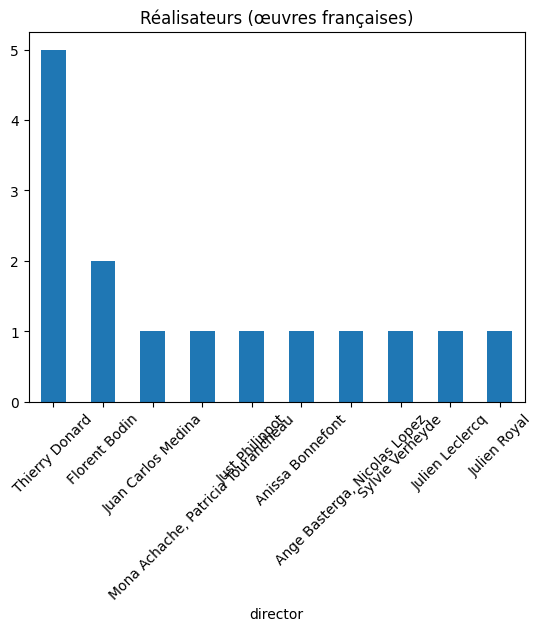

In [ ]:
fr_df = df[df['country'] == 'France']
fr_df['director'].value_counts().head(10).plot(kind='bar')
plt.title("Réalisateurs (œuvres françaises)")
plt.xticks(rotation=45)
plt.show()

Analyse : Thierry Donard, réalisateur français, se distingue avec 5 œuvres. Contrairement à 2 seulement pour le 2ème au classement

### k. Répartition des œuvres ajoutées par année

Quand les œuvres ont-elles été ajoutées sur Netflix ?


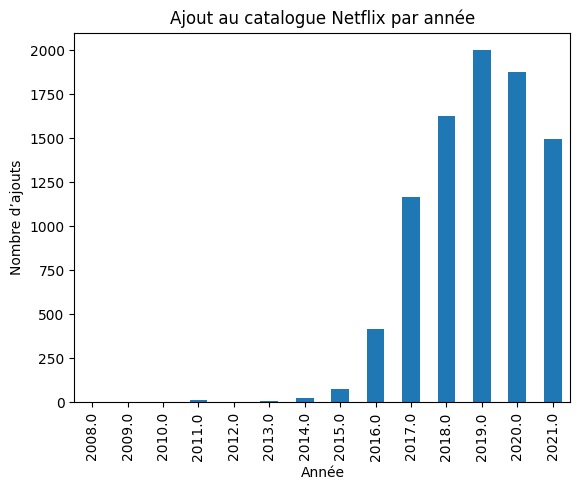

In [ ]:
df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Ajout au catalogue Netflix par année")
plt.xlabel("Année")
plt.ylabel("Nombre d’ajouts")
plt.show()

Analyse : Le nombre d'œuvres ajoutées par année atteint un pic en 2019 (2000) et 2020 (1950).

**Exploiter les pics de production (2019–2020)** </br>
Ces années ont vu un afflux de contenus :
- Organiser des rétrospectives annuelles, comme “Le meilleur de Netflix 2019”
- Mettre en avant les œuvres oubliées de cette période pour leur redonner de la visibilité

#### l. Évolution mensuelle des ajouts au catalogue

Ce graphique permet d’identifier les périodes où Netflix ajoute le plus de contenu à son catalogue.


In [ ]:
df['year_month_added'] = df['date_added'].dt.to_period('M')
df['year_month_added'].value_counts().sort_index().plot(kind='line', figsize=(14, 5))
plt.title("Évolution des ajouts mensuels au catalogue")
plt.xlabel("Date")
plt.ylabel("Nombre d’ajouts")
plt.grid(True)
plt.show()

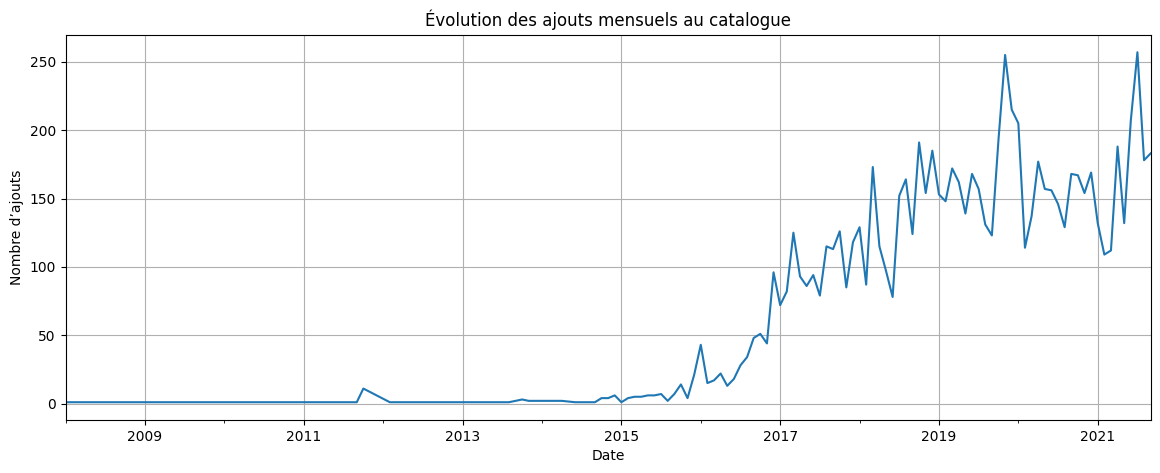

Analyse : On observe des pics d’ajouts entre 2019 et 2020, probablement liés à la pandémie de Covid-19, avec un ralentissement ensuite.

### m. Durée moyenne des séries par pays

Ce graphique permet de repérer les pays dont les séries sont les plus longues en nombre de saisons.


In [ ]:
series = df[df['type'] == 'TV Show']
country_season_avg = series.groupby('country')['duration_seasons'].mean().dropna().sort_values(ascending=False).head(10)
country_season_avg.plot(kind='bar')
plt.title("Pays avec les séries les plus longues (en moyenne)")
plt.xlabel("Pays")
plt.ylabel("Nb moyen de saisons")
plt.xticks(rotation=45)
plt.show()

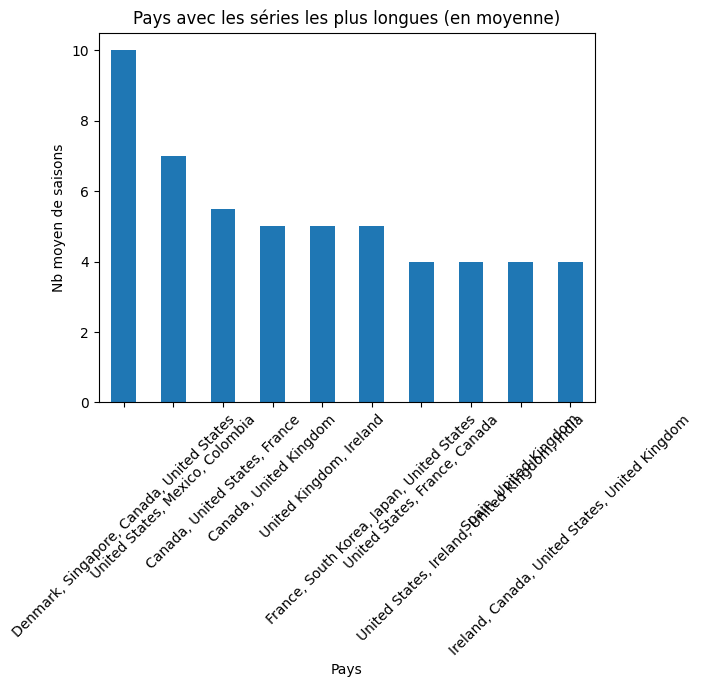

Analyse : Certains pays comme le Danemark, Canada, Etats-Unis produisent des séries plus longues en moyenne, ce qui peut refléter une préférence culturelle pour les feuilletons étendus.

### n. Genres les plus populaires selon le type d’œuvre

Nous comparons ici les genres les plus représentés dans les films et les séries.


In [ ]:
from collections import Counter

def top_genres_by_type(df, type_name):
    genres = df[df['type'] == type_name]['listed_in_list']
    all_genres = sum(genres, [])
    top = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)
    return top

top_movie_genres = top_genres_by_type(df, 'Movie')
top_series_genres = top_genres_by_type(df, 'TV Show')

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
top_movie_genres.plot(kind='bar', ax=ax[0], title='Genres les plus fréquents - Films')
top_series_genres.plot(kind='bar', ax=ax[1], title='Genres les plus fréquents - Séries')
plt.tight_layout()
plt.show()

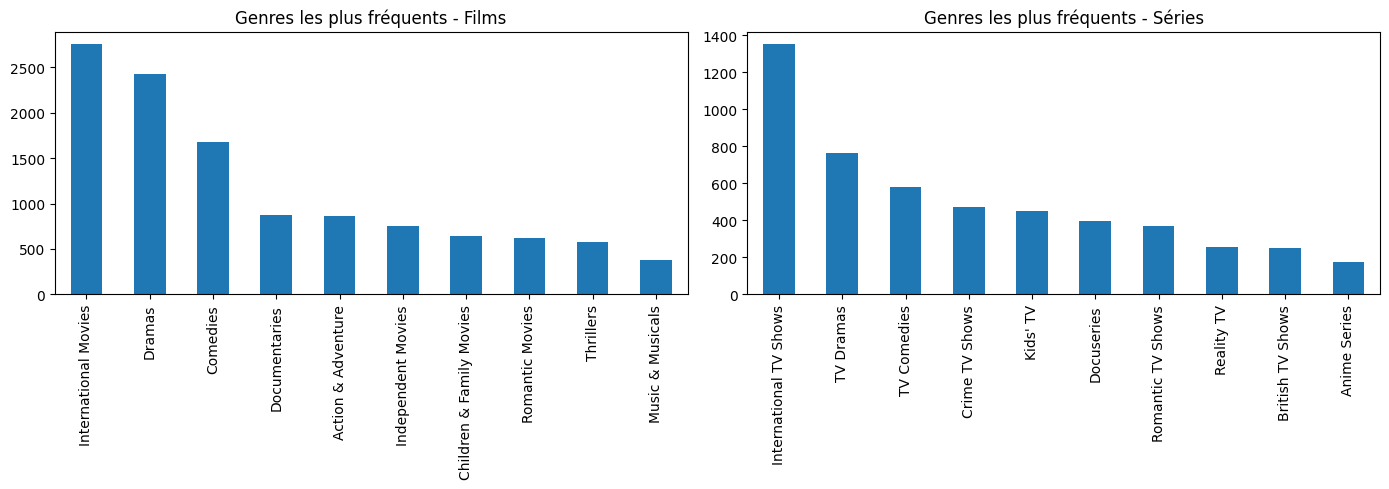

Analyse : Les films sont dominés par les documentaires et comédies, tandis que les séries privilégient les drames et thrillers.

### o. Répartition des classifications (ratings) par type d’œuvre

Ce graphique montre comment les classifications par âge diffèrent entre films et séries.

In [ ]:
rating_type = pd.crosstab(df['rating'], df['type'])
rating_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Répartition des ratings par type d’œuvre")
plt.xlabel("Classification")
plt.ylabel("Nombre d'œuvres")
plt.xticks(rotation=45)
plt.show()

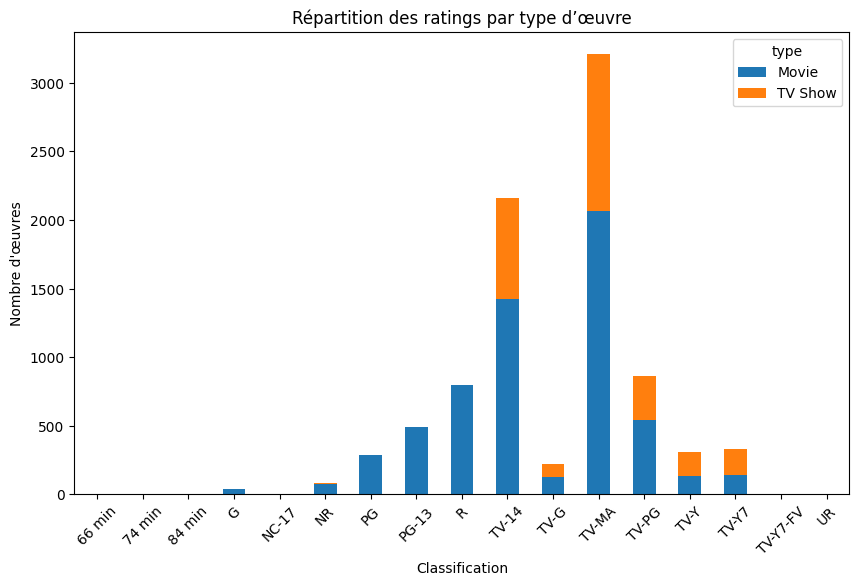

Analyse : Les films sont majoritairement classés TV-MA et PG-13, tandis que les séries ont une répartition plus équilibrée, notamment dans les contenus pour ados (TV-14, TV-PG).

# 4. Conclusion Stratégique

Cette démarche de data analyst nous permet de mieux comprendre les tendances de consommation sur Netflix en 2021.  

L’analyse approfondie des données Netflix met en lumière plusieurs insights utiles pour les prises de décisions stratégiques :

- Netflix a fortement enrichi son catalogue entre 2019 et 2020, probablement pour répondre à la hausse de la demande liée au confinement.
- Certains pays produisent des séries beaucoup plus longues que d’autres, ce qui peut être exploité pour adapter les recommandations selon les marchés.
- Les genres dominants changent selon le type d’œuvre : Netflix peut affiner ses recommandations par type (comédies/documentaires pour les films, thrillers pour les séries).
- Les films visent souvent un public adulte, tandis que les séries touchent une audience plus variée, ce qui peut guider la production de nouveaux contenus jeunesse.

**Recommandation stratégique** : Netflix pourrait augmenter l’investissement dans les séries à plusieurs saisons dans les pays à forte fidélité (Turquie, Japon), tout en ciblant les documentaires dans les pays amateurs de formats courts (comme les USA).

Grâce à cette analyse, nous avons :
- nettoyé et transformé les données Netflix,
- identifié les œuvres les plus récentes, les pays les plus représentés et les types de contenus,
- visualisé les ratings, durées, genres, réalisateurs les plus actifs, etc.

Cette démarche de data analyst nous permet de mieux comprendre les tendances de consommation sur Netflix en 2021.  
La prochaine étape serait d'intégrer des modèles prédictifs ou de recommander des contenus en fonction des préférences utilisateurs.